### 1년 동안 각 하루의 강우량 예측

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_dt = pd.read_csv("./data/train.csv")
train_dt.info()
print(train_dt.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dty

In [6]:
train_dt.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


rainfall
1    1650
0     540
Name: count, dtype: int64

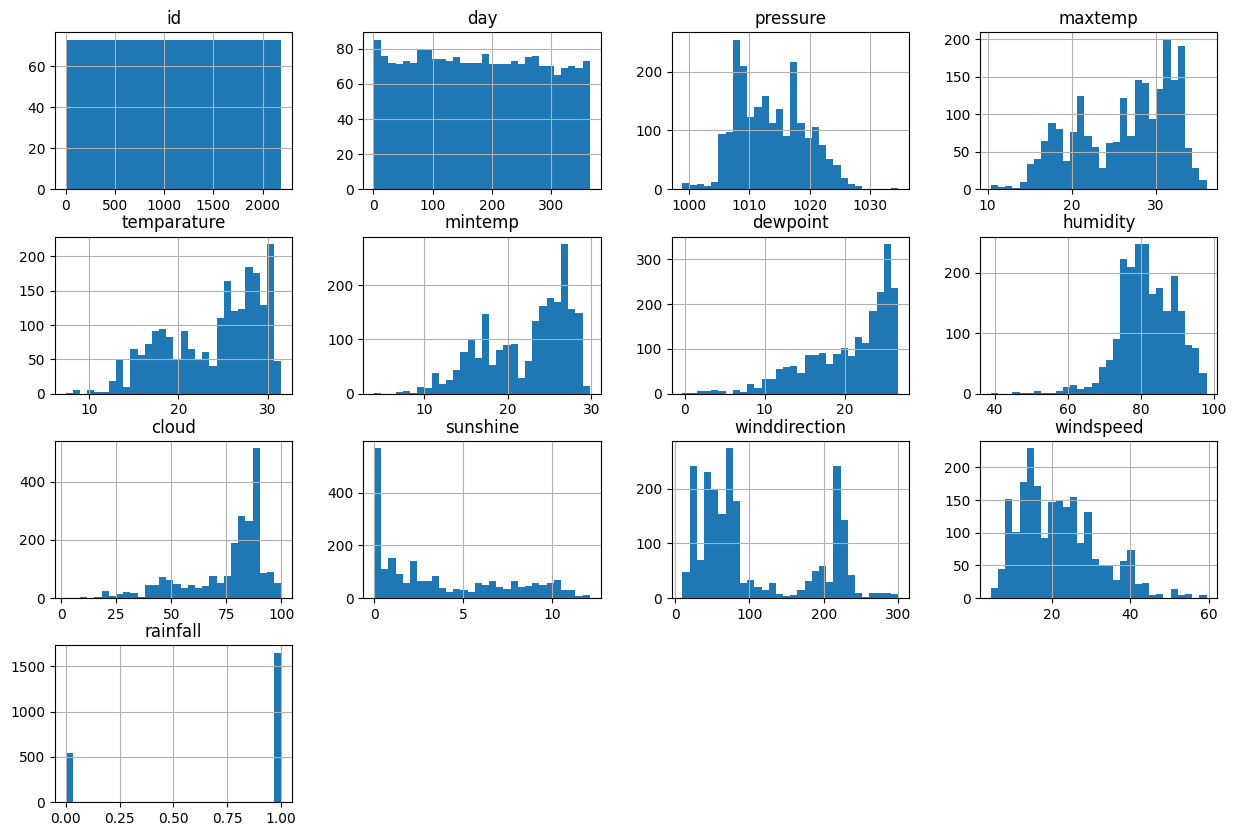

In [120]:
dt_y = train_dt["rainfall"].copy()
train_dt.hist(bins=30, figsize=(15, 10))
dt_y.value_counts()

In [15]:
print(train_dt.columns)

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')


In [ ]:
_stack = train_dt.copy()
unstack = _stack.unstack()
col = ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall']

In [ ]:
days = pd.pivot_table(_stack,index='day',columns='rainfall')
cloud = pd.DataFrame(days["cloud"])
cloud.head()
cloud.describe()

cloud = pd.DataFrame(days["cloud"])
cloud.dropna(how ='any',inplace=True)
cloud.describe()

rainfall,0,1
count,257.000000,257.000000
mean,58.173930,80.893320
std,17.034061,8.165101
min,19.000000,50.500000
25%,45.000000,77.000000
50%,58.000000,82.000000
75%,72.000000,86.500000
max,95.000000,99.200000


In [ ]:


winddirection = pd.DataFrame(days["winddirection"])
winddirection.dropna(how ='any',inplace=True)
winddirection.describe()


#########
pressure = pd.DataFrame(days["pressure"])
pressure.dropna(how="any",inplace=True)
pressure.describe()
humidity = pd.DataFrame(days["humidity"])
humidity.dropna(inplace=True, how="any")
humidity.describe()

rainfall,0,1
count,257.000000,257.000000
mean,76.535149,82.821984
std,6.185418,4.550679
min,51.000000,65.500000
25%,74.000000,79.666667
50%,76.000000,82.600000
75%,79.000000,86.000000
max,93.000000,95.000000


In [143]:
x_data = train_dt['cloud']
y_data = train_dt['rainfall']
x_data.dropna(inplace=True)
y_data.dropna(inplace=True)
print(x_data.isna().count())
print(y_data.isna().count())
print(x_data.value_counts())
print(y_data.value_counts())

2190
2190
cloud
88.0    375
84.0    129
83.0    127
78.0     95
81.0     88
       ... 
11.0      2
34.0      2
7.0       1
27.0      1
2.0       1
Name: count, Length: 78, dtype: int64
rainfall
1    1650
0     540
Name: count, dtype: int64


In [153]:
from sklearn.ensemble import RandomForestClassifier


x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.33)
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

c:\dev\Python\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [154]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1467, 1)
(1467, 1)
(723, 1)
(723, 1)


In [155]:
train_score =  rfc.score(x_train,y_train)
test_score = rfc.score(x_test,y_test)
print("훈련 점수 : ",train_score)
print("테스트 점수 : ",test_score)

훈련 점수 :  0.8670756646216768
테스트 점수 :  0.8506224066390041


In [157]:
kaggle = pd.read_csv("./data/test.csv")
kaggle_cloude = kaggle["cloud"].copy()
kaggle_cloude = np.array(kaggle_cloude).reshape(-1,1)

In [165]:
result = rfc.predict(kaggle_cloude)
result = result.tolist()

kaggle_rainfall = pd.DataFrame(result,columns=["rainfall"])
kaggle_rainfall.head()


,rainfall
0,1
1,1
2,1
3,0
4,0


In [168]:


submit = pd.concat([
    kaggle["id"],kaggle_rainfall
],axis=1)
submit.head()

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0


In [169]:
submit.to_csv("./result.csv",index=False)